# 4.10 Part 3: Instacart Visualizations

### This script contains the following points:
#### 01. Import libraries and data
#### 02. Consistency Check
#### 03. Create Sampling & Check
#### 04. Create Visualizations based on Analysis
####     a/Q1 Histogram: Number of Orders vs Day of Week & Line: Product Prices vs Day of Week
####     b/Q2 Histogram Orders vs Hour of Day & Line: Order Total vs Hour of Day
####     c/Q3 Line Chart: Product Prices vs Orders Day of Week
####     d/Q4 Histogram Orders by Department & Bar:Revenue by Department w/list of Top 10 items
####     e/Q5a Bar: Loyalty by Order Frequency & Bar: Total Revenue by Loyalty
####     f/Q5b Bar: Top 3 Departments and Bottom 3 Departments & lists
####     g/Q5c Bar: Loyalty vs Region, Bar: Sales Revenue by Region, Bar: Family Status by Region & Bar: Fam_Status Revenue by Region
####     h/Q5d Line: Age vs Dependants
####     i/Q5e Scatter: Age vs Income & Scatter: Income vs Order Total
####     j/Q5f Comparisons: Different Customer Groups
#### 05. Export df &Visualizations

# 01 Import libraries & data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

In [2]:
#create data path
path = r'C:\Users\fa_an\OneDrive\CareerFoundry\Tasks\Data Analytics Immersion\Tasks 4.1-4.10\02_2024 Instacart Basket Analysis'

In [3]:
#import data - df (instacart_excluded_rev.pkl)
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_excluded_rev.pkl'))

In [4]:
pd.set_option('display.max_columns', None)

# 02 Consistency Check

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32380882
Data columns (total 40 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    int32   
 1   user_id                     int32   
 2   order_number                int8    
 3   orders_day_of_week          category
 4   order_hour_of_day           int8    
 5   days_since_prior_order      float16 
 6   product_id                  int32   
 7   add_to_cart_order           uint8   
 8   reordered                   int8    
 9   product_name                object  
 10  department_id               int8    
 11  prices                      float32 
 12  price_label                 object  
 13  busiest_days                object  
 14  max_order                   int8    
 15  loyalty_flag                object  
 16  mean_product_price          float32 
 17  spending_flag               object  
 18  median_days_between_orders  float16 
 19  ord

In [6]:
df.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_label,busiest_days,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency_flag,Gender,State,Age,total_dependants,family_status,income,sum_order,department,Region,exclusion_flag,Age_Range,Income_Range,pet_items,baby_items,snacks,frozen,alcohol,Single_MF,Adult_Parent,Married
0,2539329,1,1,Monday,8,NaN,196,1,0,Soda,7,9.0,Mid-range product,Regularly busy,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,31.600000,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0
1,2398795,1,2,Tuesday,7,15.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,35.400002,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0
2,473747,1,3,Tuesday,12,21.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,28.200001,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0
3,2254736,1,4,Wednesday,7,29.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,26.000000,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0
4,431534,1,5,Wednesday,15,28.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,57.000000,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0
5,3367565,1,6,Monday,7,19.0,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,25.000000,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0
6,550135,1,7,Sunday,9,20.0,196,1,1,Soda,7,9.0,Mid-range product,Busiest days,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,29.000000,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0
7,3108588,1,8,Sunday,14,14.0,196,2,1,Soda,7,9.0,Mid-range product,Busiest days,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,40.200001,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0
8,2295261,1,9,Sunday,16,0.0,196,4,1,Soda,7,9.0,Mid-range product,Busiest days,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,40.200001,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0
9,2550362,1,10,Wednesday,8,30.0,196,1,1,Soda,7,9.0,Mid-range product,Slowest days,10,New Customer,6.367796,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,63.099998,beverages,South,0,1,1.0,0,0,1,0,0,2.0,1.0,1.0


In [7]:
#downsample data type to int8
df[['Single_MF', 'Adult_Parent', 'Married']] = df[['Single_MF', 'Adult_Parent', 'Married']].astype('int8')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32380882
Data columns (total 40 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    int32   
 1   user_id                     int32   
 2   order_number                int8    
 3   orders_day_of_week          category
 4   order_hour_of_day           int8    
 5   days_since_prior_order      float16 
 6   product_id                  int32   
 7   add_to_cart_order           uint8   
 8   reordered                   int8    
 9   product_name                object  
 10  department_id               int8    
 11  prices                      float32 
 12  price_label                 object  
 13  busiest_days                object  
 14  max_order                   int8    
 15  loyalty_flag                object  
 16  mean_product_price          float32 
 17  spending_flag               object  
 18  median_days_between_orders  float16 
 19  ord

# 03 Create Sampling & Check

In [9]:
#Sampling Data
#create a list holiding true/false values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [10]:
#store 70% of the sample in the dataframe big
big = df[dev]

In [11]:
#store 30% of the sample in the dataframe small
small = df[~dev]

In [12]:
#use len to check sample data/subsetting steps
len (df)

30964564

In [13]:
len(big) + len(small)

30964564

In [14]:
#those two checks match up based on the total rows in the df!

# 04 Visualizations based on Project Brief by Question#

## 04a:Histogram based on Number of Orders v Day of the Week
Q1: The sales team needs to know what the busiest days of the week and hours of the
day are (i.e., the days and times with the most orders) in order to schedule ads at
times when there are fewer orders.

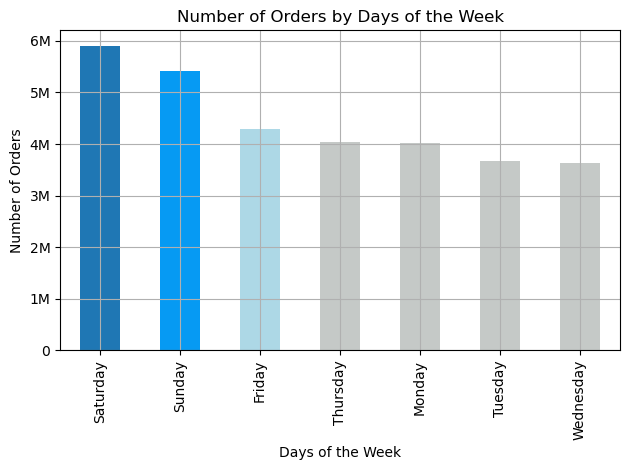

In [15]:
# Define custom colors for each day of the week
custom_colors = ['#1F77B4', '#069AF3', '#ADD8E6', '#C5C9C7', '#C5C9C7', '#C5C9C7', '#C5C9C7']

# Create a bar chart with custom colors
bar = df['orders_day_of_week'].value_counts().plot.bar(color=custom_colors)


# Add labels
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')

# Change the title
plt.title('Number of Orders by Days of the Week')

# Manually set y-axis tick labels
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000], ['0', '1M', '2M', '3M', '4M', '5M', '6M'])

# Add grid
plt.grid(True)

#save visualization
plt.tight_layout()
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


In [16]:
#reducing sample based on neccessary columns for data
df_2 = small[['prices', 'orders_day_of_week']]

C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


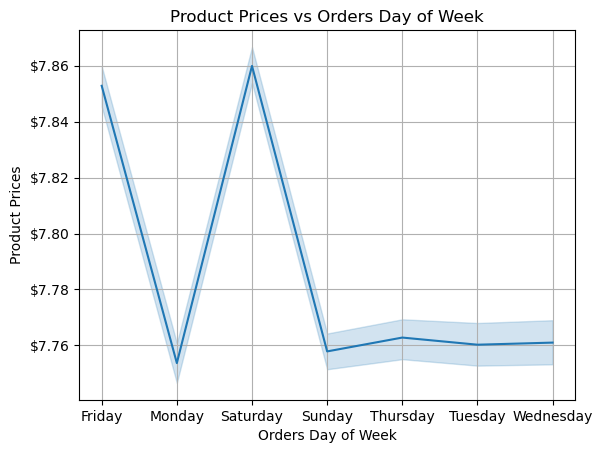

In [17]:
#create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

# Add custom chart title
plt.title('Product Prices vs Orders Day of Week')

# Update x and y axis titles
plt.xlabel('Orders Day of Week')
plt.ylabel('Product Prices')

# Format y-axis ticks as currency
formatter = ticker.FormatStrFormatter('$%.2f')  # Change '.2f' to adjust decimal places
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid
plt.grid(True)

#save visualization
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))

## 04b Histogram Orders vs Hour of Day
Q2: They also want to know whether there are particular times of the day when people
spend the most money, as this might inform the type of products they advertise at
these times.

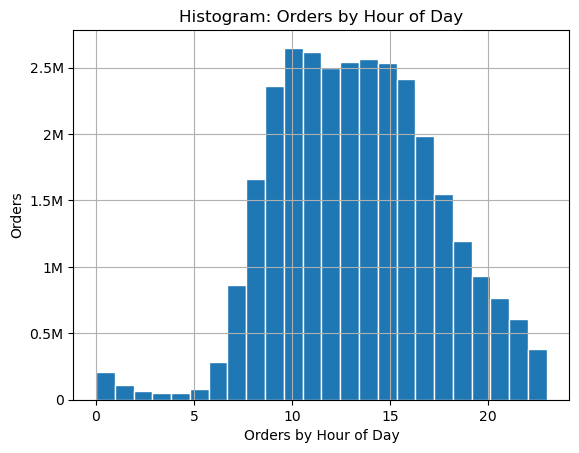

In [18]:
#create a histogram of orders hour of day column
hist = df['order_hour_of_day'].plot.hist(bins = 24, edgecolor='white')

# Add labels
plt.xlabel('Orders by Hour of Day')
plt.ylabel('Orders')

# Change the title
plt.title('Histogram: Orders by Hour of Day')
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000], ['0', '0.5M', '1M', '1.5M', '2M', '2.5M'])

# Add grid
plt.grid(True)

#save visual
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ohd.png'))

In [19]:
#reducing sample based on neccessary columns to pull data from
df_3 = small[['order_hour_of_day', 'sum_order']]

C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


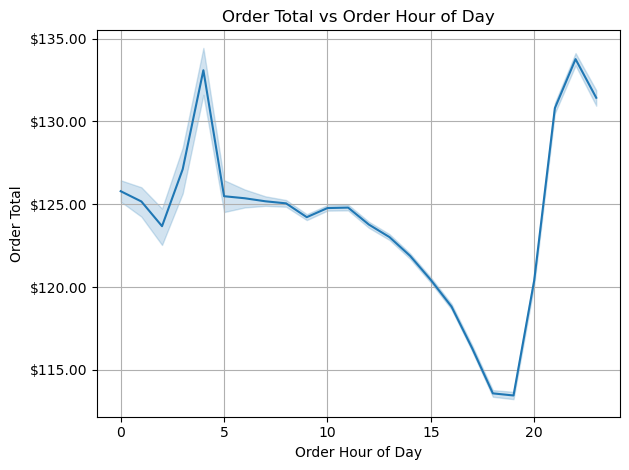

In [20]:
#create line chart based on df_5 and small sample
line_2 =sns.lineplot(data= df_3, x = 'order_hour_of_day', y = 'sum_order')

# Add title and axis labels
plt.title('Order Total vs Order Hour of Day')
plt.xlabel('Order Hour of Day')
plt.ylabel('Order Total')

# Format y-axis ticks as currency
formatter = ticker.FormatStrFormatter('$%.2f')  # Change '.2f' to adjust decimal places
plt.gca().yaxis.set_major_formatter(formatter)

# Add grid
plt.grid(True)

# Adjust plot dimensions
plt.tight_layout()

#save visualization
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line2_ordertotal_by_hour.png'))

## 04c: Histogram of Product Prices
Q3: Instacart has a lot of products with different price tags. Marketing and sales want to
use simpler price range groupings to help direct their efforts.

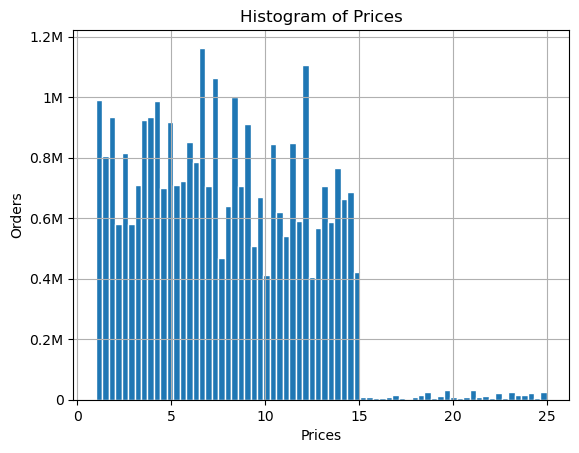

In [21]:
# Create a histogram of prices column with thin lines around the bars
hist2 = df['prices'].plot.hist(bins=70, edgecolor='white')

# Add labels
plt.xlabel('Prices')
plt.ylabel('Orders')

# Change the title
plt.title('Histogram of Prices')

# Manually set y-axis tick labels
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000], ['0', '0.2M', '0.4M', '0.6M', '0.8M', '1M', '1.2M'])

# Add grid
plt.grid(True)

#save visual
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist2_prices.png'))

In [22]:
#count based on distrubtion of price_label
df['price_label'].value_counts(dropna = False)

price_label
Mid-range product     20891771
Low-range product      9674840
High Range Product      397953
Name: count, dtype: int64

In [23]:
# Group by both 'product_id' and 'price_label' and calculate the count of unique combinations
price_label_counts = df.groupby(['product_id', 'price_label']).size().reset_index(name='count')

# Print the count of unique combinations for each 'price_label'
print(price_label_counts['price_label'].value_counts())

price_label
Mid-range product     32802
Low-range product     16280
High Range Product      547
Name: count, dtype: int64


In [24]:
#This is the breakdown of price_label by unique product_id. Breakdown of proposed price_labels:
#Low-range: <=5
#Mid-range: >5 and <=15
#High Range: >15

In [25]:
#Price_label revenue totals:

sorted_df2 = df.groupby('price_label')['prices'].sum().sort_values(ascending=False)

# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(sorted_df2)

price_label
Mid-range product    203836368.00
Low-range product     29255100.00
High Range Product     8102771.50
Name: prices, dtype: float32


## 04d Hist3: Orders by Department and Bar2:Revenue by Department w/list of Top 10 items
Q4: Are there certain types of products that are more popular than others? The marketing
and sales teams want to know which departments have the highest frequency of
product orders.

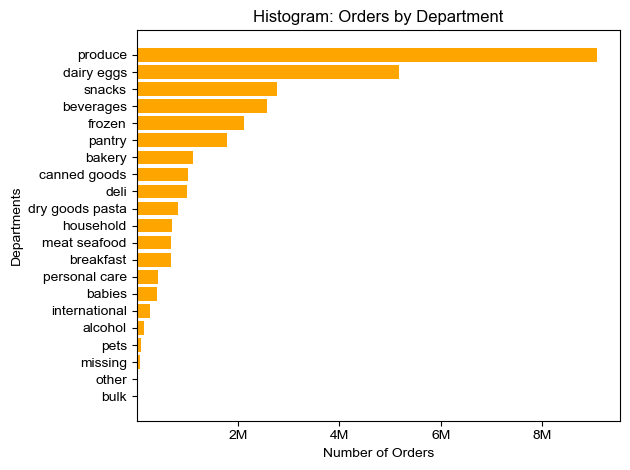

In [26]:
# Sort the DataFrame in descending order based on department frequency
sorted_df = df['department'].value_counts().sort_values(ascending=True)

# Create a horizontal bar plot of orders by department with largest value on top
hist3 = plt.barh(sorted_df.index, sorted_df.values, color='#FFA500')

# Set background style using seaborn
sns.set_style('whitegrid')

# Add labels
plt.xlabel('Number of Orders')
plt.ylabel('Departments')

# Change the title
plt.title('Histogram: Orders by Department')

# Set x-axis ticks and labels without scientific notation
plt.xticks([2000000, 4000000, 6000000, 8000000], ['2M', '4M', '6M', '8M'])

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist3_orders_dept.png'))

# Show the plot
plt.show()

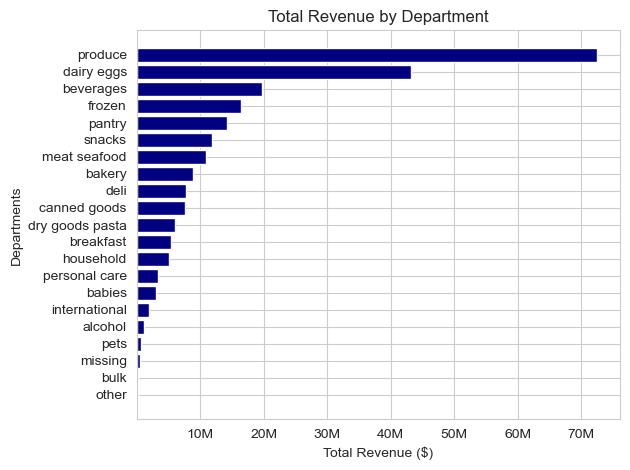

In [27]:
# Sort the DataFrame in descending order based on total revenue by department
sorted_df = df.groupby('department')['prices'].sum().sort_values(ascending=True)

# Create a horizontal bar plot of total revenue by department
bar2 = plt.barh(sorted_df.index, sorted_df.values, color='navy')

# Set background style using seaborn
sns.set_style('whitegrid')

# Add labels
plt.xlabel('Total Revenue ($)')
plt.ylabel('Departments')

# Change the title
plt.title('Total Revenue by Department')

# Set x-axis tick labels as '10M' through '70M'
plt.xticks([10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000], ['10M', '20M', '30M', '40M', '50M', '60M', '70M'])

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar2_rev_dept.png'))

# Show the plot
plt.show()


In [28]:
#Department revenue totals:

sorted_df = df.groupby('department')['prices'].sum().sort_values(ascending=False)

# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(sorted_df)

department
produce           72455760.00
dairy eggs        43118260.00
beverages         19758774.00
frozen            16408884.00
pantry            14287456.00
snacks            11827920.00
meat seafood      10998953.00
bakery             8806886.00
deli               7813188.00
canned goods       7637778.50
dry goods pasta    6042181.50
breakfast          5388030.00
household          5164910.50
personal care      3393915.00
babies             3133096.50
international      1965702.88
alcohol            1178811.12
pets                734009.69
missing             560933.31
bulk                279212.78
other               239569.20
Name: prices, dtype: float32


In [29]:
# Calculate the total sales across all departments
total_sales = df['prices'].sum()

# Print the total sales
print("Total sales across all departments:", total_sales)


Total sales across all departments: 241194460.0


In [30]:
#Produce department revenue accounts for ($72,455,760) 30% of the overall revenue for this dataset/time. People enjoy fresh produce!

In [31]:
# Calculate the total revenue for each product
product_revenue = df.groupby(['department', 'product_name'])['prices'].sum()

# Sort the products by total revenue and get the top 10
top_selling_products = product_revenue.sort_values(ascending=False).head(10)

# Print the top selling products and their total revenue
print("Top 10 selling products:")
print(top_selling_products)



Top 10 selling products:
department  product_name            
produce     Banana                     5573917.50
            Bag of Organic Bananas     3773951.00
            Large Lemon                2035558.00
            Limes                      1980839.62
            Organic Baby Spinach       1900530.38
            Organic Strawberries       1868712.50
dairy eggs  Organic Whole Milk         1708979.25
produce     Cucumber Kirby             1222478.38
            Apple Honeycrisp Organic   1161120.88
            Organic Cucumber           1108235.75
Name: prices, dtype: float32


In [32]:
#Above is the break down of Revenue for the Top 10 products sold in the Produce department. Make note that 1/2
#of the items are denoted as Organic and are mostly fruit!

In [33]:
#Bottom 10 selling products

# Sort the products by total revenue and get the bottom 10
bottom_selling_products = product_revenue.sort_values(ascending=False).tail(10)

# Print the bottom selling products and their total revenue
print("Bottom 10 selling products:")
print(bottom_selling_products)

Bottom 10 selling products:
department     product_name                    
international  Mung Dal with Spinach              1.60
frozen         Flatbread Pizza All Natural        1.60
missing        Original Jerky                     1.50
pantry         Jamaican Allspice                  1.50
               Tikka Masala Simmering Sauce       1.40
               Bourbon Vanilla Bean               1.40
alcohol        Chardonnay Carneros                1.30
personal care  Glycerine Soap Cucumber            1.10
dairy eggs     2 % Reduced Fat  Milk              0.00
               Lowfat 2% Milkfat Cottage Cheese   0.00
Name: prices, dtype: float32


In [34]:
#Here are the Bottom 10 selling products denoting the department and total revenue. Review stock on hand and run specials for customers
#checking out for a reduced price. And discontinue.

## 04e: Bar3: Loyalty by Order Frequency and Bar4: Total Revenue by Loyalty
Q5a: The marketing and sales teams are particularly interested in the different types of
customers and ordering behaviors. *What’s the distribution among users in regards to their brand loyalty (i.e., how
often do they return to Instacart)?

In [35]:
# Group the DataFrame by 'loyalty_flag' and count the number of unique user_ids for each loyalty_flag category
loyalty_flag_counts_by_user = df.groupby('loyalty_flag')['user_id'].nunique()

# Display the counts of unique user_ids by loyalty_flag categories
print(loyalty_flag_counts_by_user)



loyalty_flag
Loyal Customer      17017
New Customer        68750
Regular Customer    76864
Name: user_id, dtype: int64


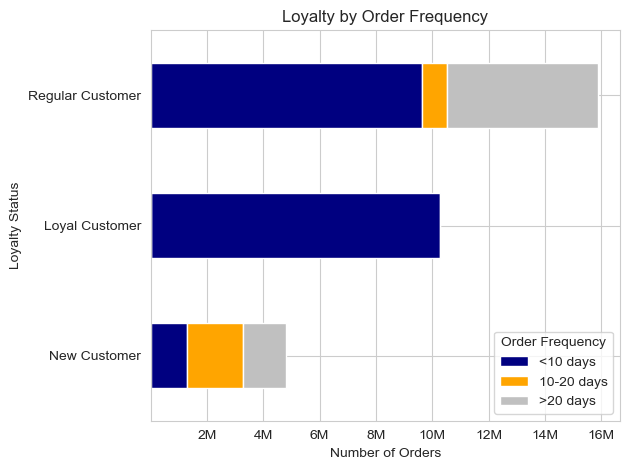

In [36]:
# Group the DataFrame by 'loyalty_flag' and 'order_frequency_flag' and calculate the count of orders for each combination
loyalty_frequency_counts = df.groupby(['loyalty_flag', 'order_frequency_flag']).size().unstack()

# Define custom sorting order for loyalty flag
loyalty_order = ['New Customer', 'Loyal Customer', 'Regular Customer']

# Reindex the loyalty flags based on the custom sorting order
loyalty_frequency_counts = loyalty_frequency_counts.reindex(loyalty_order, axis=0)

# Create a horizontal bar plot of loyalty flag by order frequency flag
bar3 = loyalty_frequency_counts.plot(kind='barh', stacked=True, color=['navy', 'orange', 'silver'])

# Add grid
plt.grid(True)

# Add labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Loyalty Status')
plt.title('Loyalty by Order Frequency')

# Set x-axis tick labels as '2M' through '16M'
tick_labels = ['{}M'.format(i * 2) for i in range(1, 9)]
plt.xticks([i * 2e6 for i in range(1, 9)], tick_labels)

# Customize legend and order frequency flag labels
plt.legend(labels=['<10 days', '10-20 days', '>20 days'], title='Order Frequency')

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar3_loyal_orderf.png'))

# Show the plot
plt.show()


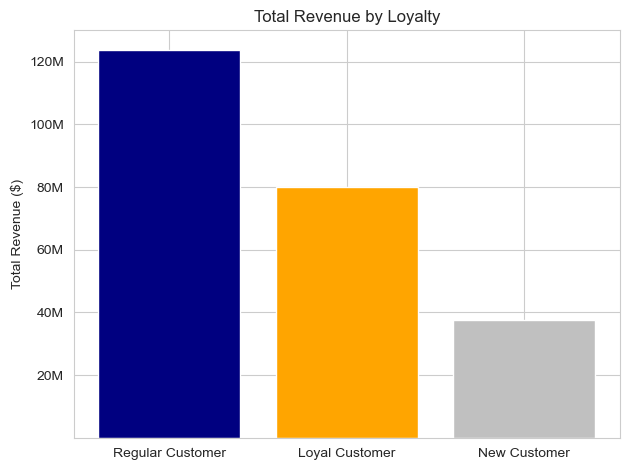

In [37]:
# Sort the DataFrame in descending order based on total revenue by department
sorted_df2 = df.groupby('loyalty_flag')['prices'].sum().sort_values(ascending=False)

# Define colors for each loyalty flag
loyalty_colors = {'Regular Customer': 'navy', 'Loyal Customer': 'orange', 'New Customer': 'silver'}

# Create a horizontal bar plot of total revenue by department with customized colors
bar4 = plt.bar(sorted_df2.index, sorted_df2.values, color=[loyalty_colors[flag] for flag in sorted_df2.index])

# Set background style using seaborn
sns.set_style('whitegrid')

# Add labels
plt.ylabel('Total Revenue ($)')

# Change the title
plt.title('Total Revenue by Loyalty')

# Set x-axis tick labels as '10M' through '70M'
plt.yticks([20000000, 40000000, 60000000, 80000000, 100000000, 120000000], ['20M', '40M', '60M', '80M', '100M', '120M'])

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar4_rev_loyal.png'))

# Show the plot
plt.show()


In [38]:
# Group the DataFrame by 'loyalty_flag' and calculate the total revenue for each loyalty flag
revenue_by_loyalty_flag = df.groupby('loyalty_flag')['prices'].sum()

# Sort the results in descending order based on total revenue
sorted_revenue_by_loyalty_flag = revenue_by_loyalty_flag.sort_values(ascending=False)

# Display the sorted results
print(sorted_revenue_by_loyalty_flag)


loyalty_flag
Regular Customer   123790608.00
Loyal Customer      79933824.00
New Customer        37469804.00
Name: prices, dtype: float32


## 04f: Bar5 and Bar6: Top 3 Departments and Bottom 3 Departments
Q5b: Are there differences in ordering habits based on a customer’s loyalty status? Look at Loyalty Revenue by Department.

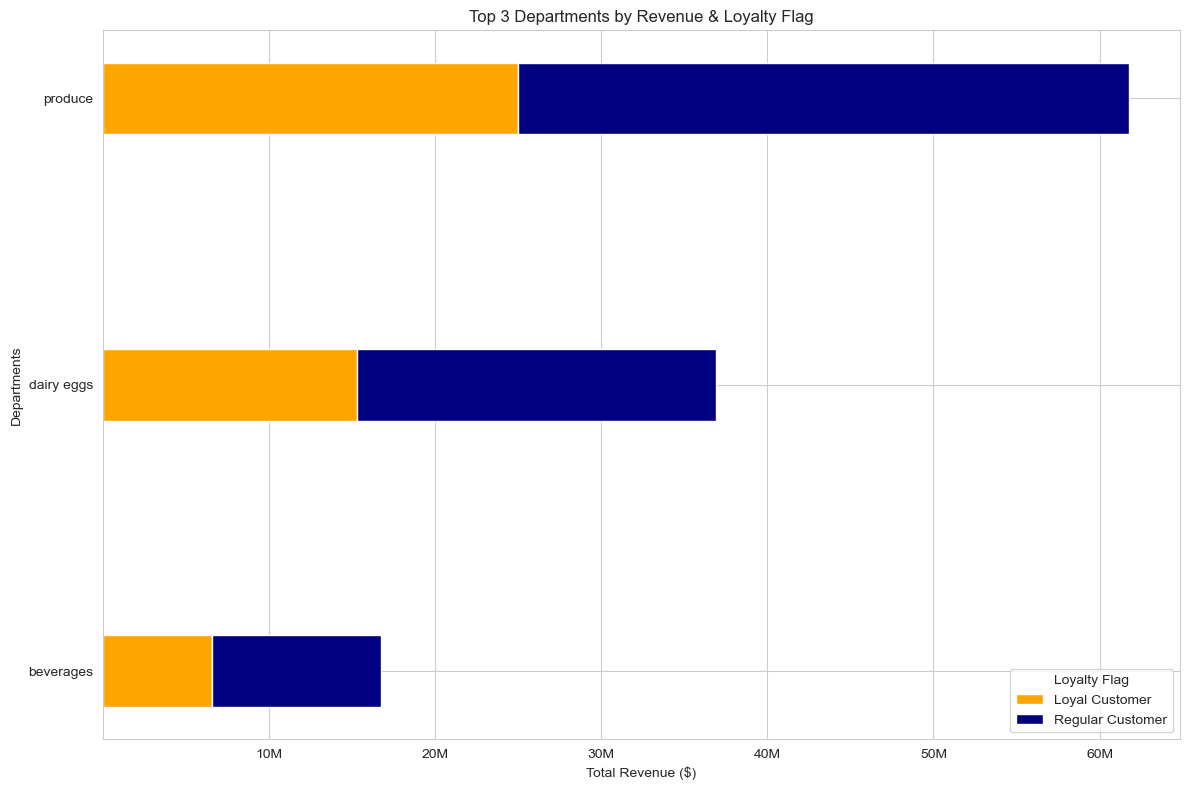

In [39]:
# Group the DataFrame by 'loyalty_flag' and 'department' and calculate the sum of prices for each combination
loyalty_department_revenue = df.groupby(['loyalty_flag', 'department'])['prices'].sum().unstack()

# Get the top 3 revenue-generating departments for each loyalty flag
top3_departments = loyalty_department_revenue.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)


# Filter out the "New Customer" data from the top3_departments DataFrame
top3_departments_filtered = top3_departments.drop("New Customer", errors="ignore")


# Get the top 3 revenue-generating departments for each loyalty flag
top3_departments = loyalty_department_revenue.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Create a horizontal bar chart with multiple series
bar5 = fig, ax = plt.subplots(figsize=(12, 8))

# Width of each bar
bar_width = 0.25

# Define custom colors for each loyalty flag
colors = {'Regular Customer': 'navy', 'Loyal Customer': 'orange'}

# Iterate over each loyalty flag and plot the revenue for its top 3 revenue-generating departments
bottom = None
for i, loyalty_flag in enumerate(top3_departments_filtered.index):
    top_departments = top3_departments_filtered.loc[loyalty_flag]
    top_department_revenue = loyalty_department_revenue.loc[loyalty_flag, top_departments]
    # Sort the departments and corresponding revenue in ascending order
    top_departments, top_department_revenue = zip(*sorted(zip(top_departments, top_department_revenue.items())))
    top_department_revenue = [v for k, v in top_department_revenue]
    ax.barh(top_departments, top_department_revenue, color=colors[loyalty_flag], height=bar_width, label=loyalty_flag, left=bottom)
    if bottom is None:
        bottom = top_department_revenue
    else:
        bottom = [a + b for a, b in zip(bottom, top_department_revenue)]

# Add labels and title
ax.set_xlabel('Total Revenue ($)')
ax.set_ylabel('Departments')
ax.set_title('Top 3 Departments by Revenue & Loyalty Flag')
ax.legend(title='Loyalty Flag', loc='lower right')

# Set x-axis tick labels as
plt.xticks([10000000, 20000000, 30000000, 40000000, 50000000, 60000000], ['10M', '20M', '30M', '40M', '50M', '60M'])

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar5_top3_dept.png'))

# Show the plot
plt.show()


In [40]:
#As already known the Regular customers contribute more to overall revenue across the Top 3 departments. Top 3 departments by revenue are
#Produce, dairy eggs and beverages.

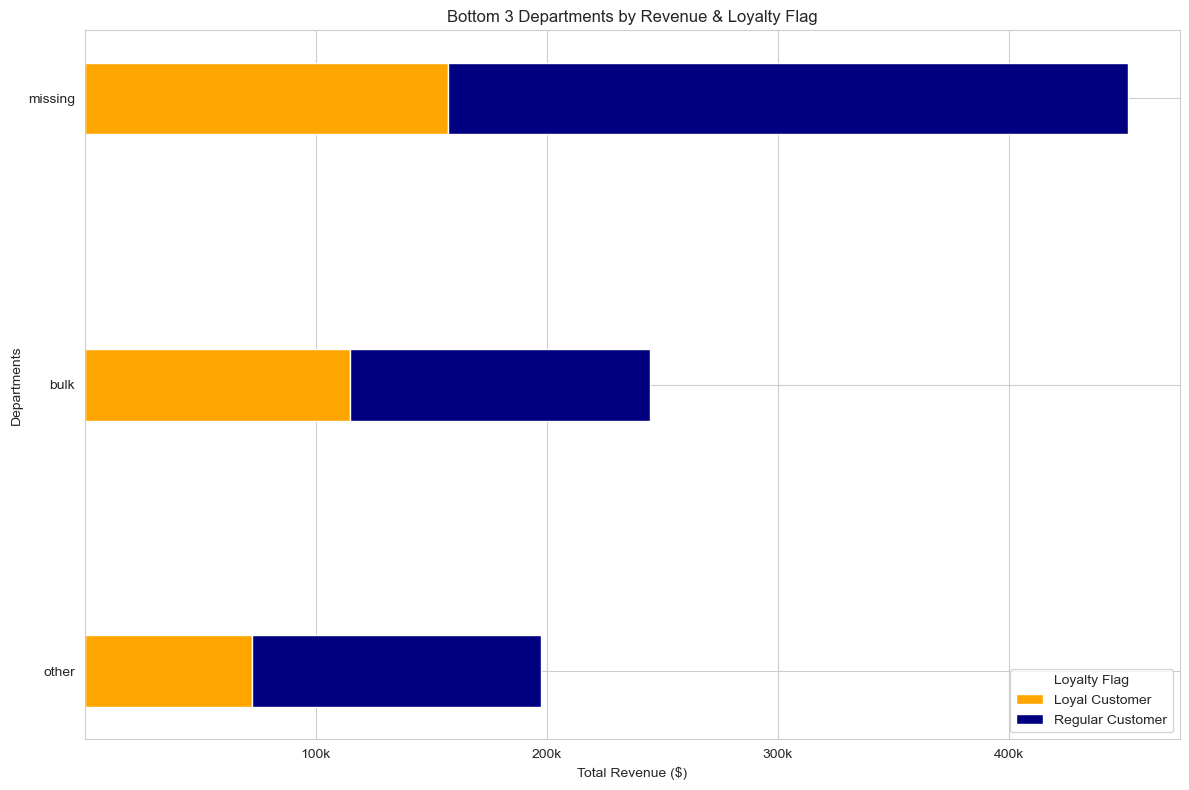

In [41]:
# Filter out the "New Customer" data from the top3_departments DataFrame
loyalty_department_revenue_filtered = loyalty_department_revenue.drop("New Customer", errors="ignore")

# Keep only the bottom 3 departments
bottom3_departments = loyalty_department_revenue_filtered.sum(axis=0).nsmallest(3).index

# Create a horizontal bar chart with multiple series
bar6 = fig, ax = plt.subplots(figsize=(12, 8))

# Width of each bar
bar_width = 0.25

# Define custom colors for each loyalty flag
colors = {'Regular Customer': 'navy', 'Loyal Customer': 'orange'}

# Iterate over each loyalty flag and plot the revenue for its bottom 3 revenue-generating departments
bottom = None
for i, loyalty_flag in enumerate(loyalty_department_revenue_filtered.index):
    bottom_department_revenue = loyalty_department_revenue_filtered.loc[loyalty_flag, bottom3_departments]
    ax.barh(bottom3_departments, bottom_department_revenue, color=colors[loyalty_flag], height=bar_width, label=loyalty_flag, left=bottom)
    if bottom is None:
        bottom = bottom_department_revenue
    else:
        bottom = [a + b for a, b in zip(bottom, bottom_department_revenue)]
        
# Set x-axis tick labels
plt.xticks([100000, 200000, 300000, 400000], ['100k', '200k', '300k', '400k'])

# Add labels and title
ax.set_xlabel('Total Revenue ($)')
ax.set_ylabel('Departments')
ax.set_title('Bottom 3 Departments by Revenue & Loyalty Flag')
ax.legend(title='Loyalty Flag', loc='lower right')

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar6_bot3_dept.png'))

# Show the plot
plt.show()


In [42]:
#Explore, top and bottom selling products by loyalty_flag and price_label.

In [43]:
#same as above except this is for loyalty flag = Regular Customer

# Filter the DataFrame for regular customers
regular_customers_df = df[df['loyalty_flag'] == 'Regular Customer']

# Set the float format to disable scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calculate the total revenue for each product for regular customers
regular_customer_product_revenue = regular_customers_df.groupby('product_name')['prices'].sum()

# Sort the products by total revenue for regular customers and get the top 10
top_selling_regular_products = regular_customer_product_revenue.sort_values(ascending=False).head(10)

# Print the top selling products and their total revenue for regular customers
print("Top selling products for Regular Customers:")
print(top_selling_regular_products)

Top selling products for Regular Customers:
product_name
Banana                     2867585.25
Bag of Organic Bananas     1815385.38
Large Lemon                1082032.00
Limes                      1021679.38
Organic Baby Spinach        975193.19
Organic Strawberries        879723.00
Organic Whole Milk          797094.44
Cucumber Kirby              667537.19
Organic Avocado             565078.50
Apple Honeycrisp Organic    540960.62
Name: prices, dtype: float32


In [44]:
#same as above except this is for loyalty flag = Loyal Customer

# Filter the DataFrame for regular customers
loyal_customers_df = df[df['loyalty_flag'] == 'Loyal Customer']

# Set the float format to disable scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calculate the total revenue for each product for regular customers
loyal_customer_product_revenue = loyal_customers_df.groupby('product_name')['prices'].sum()

# Sort the products by total revenue for regular customers and get the top 10
top_selling_loyal_products = loyal_customer_product_revenue.sort_values(ascending=False).head(10)

# Print the top selling products and their total revenue for regular customers
print("Top selling products for Loyal Customers:")
print(top_selling_loyal_products)

Top selling products for Loyal Customers:
product_name
Banana                     1909698.00
Bag of Organic Bananas     1486331.25
Organic Strawberries        767850.50
Organic Whole Milk          720294.44
Limes                       663778.50
Organic Baby Spinach        653302.19
Large Lemon                 616336.00
Apple Honeycrisp Organic    484955.41
Organic Cucumber            426283.00
Cucumber Kirby              340797.59
Name: prices, dtype: float32


In [45]:
df['price_label'].value_counts(dropna=False)

price_label
Mid-range product     20891771
Low-range product      9674840
High Range Product      397953
Name: count, dtype: int64

In [46]:
# Filter the DataFrame for High Range Products
high_range_products_df = df[df['price_label'] == 'High Range Product']

# Group by 'loyalty_flag' and 'product_name', and then sum the prices to get the revenue sold for each 'product_name' within each group
revenue_by_product_by_loyalty = high_range_products_df.groupby(['loyalty_flag', 'product_name', 'prices'])['prices'].sum()

# Find the top 10 most often purchased products in each loyalty group
top_10_most_purchased_products = revenue_by_product_by_loyalty.groupby(level='loyalty_flag').nlargest(10)

# Print the result
print("Top 10 most often purchased products in the 'High Range Product' group, grouped by loyalty_flag with revenue:")
print(top_10_most_purchased_products)


Top 10 most often purchased products in the 'High Range Product' group, grouped by loyalty_flag with revenue:
loyalty_flag      loyalty_flag      product_name                          prices
Loyal Customer    Loyal Customer    Ground Turkey Breast                  19.60    165933.61
                                    Organic Beef Hot Dogs                 22.30    156434.50
                                    Organic Turkey Bacon                  24.20    130728.41
                                    Organic Chicken & Apple Sausage       21.10    105078.00
                                    Tilapia Filet                         18.20     97570.20
                                    Organic Beef Uncured Hot Dogs         21.10     96912.30
                                    Boneless Skinless Chicken Thighs      25.00     76600.00
                                    85% Lean Ground Beef                  23.20     71108.00
                                    Applewood Smoked Bacon       

In [47]:
# Filter the DataFrame for Low Range Products
low_range_products_df = df[df['price_label'] == 'Low-range product']

# Group by 'loyalty_flag' and 'product_name', and then count the occurrences of each 'product_name' within each group
low_product_counts_by_loyalty = low_range_products_df.groupby(['loyalty_flag', 'product_name', 'prices'])['prices'].sum()

# Find the top 10 most often purchased products in each loyalty group
top_10_most_purchased_low_products = low_product_counts_by_loyalty.groupby(level='loyalty_flag').nlargest(10)

# Print the result
print("Top 10 most often purchased products in the 'Low Range Product' group, grouped by loyalty_flag:")
print(top_10_most_purchased_low_products)

Top 10 most often purchased products in the 'Low Range Product' group, grouped by loyalty_flag:
loyalty_flag      loyalty_flag      product_name                       prices
Loyal Customer    Loyal Customer    Organic Hass Avocado               4.00     336828.00
                                    Organic Raspberries                4.40     247680.41
                                    Organic Baby Arugula               4.90     116174.10
                                    Organic Lemon                      3.60     114861.59
                                    Sparkling Water Grapefruit         4.20     104705.99
                                    Organic Cilantro                   4.50     101808.00
                                    Organic Garnet Sweet Potato (Yam)  4.10      80495.30
                                    Red Vine Tomato                    4.50      72954.00
                                    Organic Peeled Whole Baby Carrots  3.80      71565.40
                

In [48]:
#Summarized by total revenue by price_range and loyalty_flag TOP 10: The most revenue of High Range Products are in the meat seafood department. The most revenue of Low-range products are in the produce department. Low-range products generate more revenue than High Range Products.

# 04g: Bar: Loyalty vs Region, Bar: Sales Revenue by Region, Bar: Fam_Status by Region & Bar: Fam_Status Revenue by Region
Q5c: Are there differences in ordering habits based on a customer’s region?

In [49]:
#Get count of users by region as well as by loyalty_flag with revenue

# Group by 'loyalty_flag' and 'Region', and prices.sum
loyalty_region_summary = df.groupby(['Region', 'loyalty_flag'])['prices'].sum()

# Print the result
print(loyalty_region_summary)


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\755851939.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loyalty_region_summary = df.groupby(['Region', 'loyalty_flag'])['prices'].sum()


Region     loyalty_flag    
MidWest    Loyal Customer     18454716.00
           New Customer        8871718.00
           Regular Customer   29248180.00
Northeast  Loyal Customer     14303275.00
           New Customer        6554302.50
           Regular Customer   21659298.00
South      Loyal Customer     26486918.00
           New Customer       12435205.00
           Regular Customer   41434200.00
West       Loyal Customer     20688918.00
           New Customer        9608579.00
           Regular Customer   31448930.00
Name: prices, dtype: float32


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\1148909293.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_user_counts_by_region = df.groupby(['loyalty_flag', 'Region'])['user_id'].nunique()


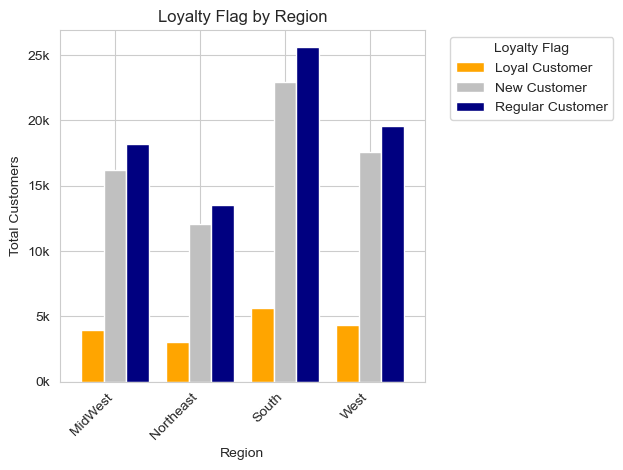

In [50]:
import matplotlib.pyplot as plt

# Group by 'loyalty_flag' and 'Region', and count the number of unique 'user_ids' in each group
unique_user_counts_by_region = df.groupby(['loyalty_flag', 'Region'])['user_id'].nunique()

# Convert the result to a DataFrame
unique_user_counts_by_region = unique_user_counts_by_region.unstack()

# Define custom colors for the loyalty flags
colors = ['orange', 'silver', 'navy']

# Plotting
bar7 = unique_user_counts_by_region.T.plot(kind='bar', color=colors, width=0.8)
plt.title('Loyalty Flag by Region')
plt.xlabel('Region')
plt.ylabel('Total Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}k'.format(x / 1000)))

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar7_loyal_region.png'))

plt.show()


In [51]:
#All regions have high counts of Regular customers over New and Loyal. The region with the most Loyal customers are in the South. The South also ranks the highest in all loyalty_flag categories in the US. It's also the largest region, continaing a few more states than other regions.

In [52]:
#Adult Parents is a customer profiles in the database, get counts by Region.

# Group by 'Adult_Parent' and 'Region', and count the number of unique 'user_ids' in each group
Adult_Parent_counts_by_region = df.groupby(['Adult_Parent', 'Region'])['user_id'].nunique()

# Print the result
print("Adult_Parents_by Region:")
print(Adult_Parent_counts_by_region)

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\2133552074.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Adult_Parent_counts_by_region = df.groupby(['Adult_Parent', 'Region'])['user_id'].nunique()


Adult_Parents_by Region:
Adult_Parent  Region   
0             MidWest      28168
              Northeast    20873
              South        39721
              West         30390
1             MidWest      10208
              Northeast     7708
              South        14472
              West         11091
Name: user_id, dtype: int64


In [53]:
#There are more Adult_Parents in the South, the least in the Northeast.

In [54]:
#Married is one the largest customer profiles in the database, get counts by Region.

# Group by 'Married' and 'Region', and count the number of unique 'user_ids' in each group
Married_counts_by_region = df.groupby(['Married', 'Region'])['user_id'].nunique()

# Print the result
print("Married_by Region:")
print(Married_counts_by_region)

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\2055560752.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Married_counts_by_region = df.groupby(['Married', 'Region'])['user_id'].nunique()


Married_by Region:
Married  Region   
0        MidWest      11406
         Northeast     8481
         South        16141
         West         12307
1        MidWest      26970
         Northeast    20100
         South        38052
         West         29174
Name: user_id, dtype: int64


In [55]:
#There are more Married customers in the South, the least amount in the Northeast.

In [56]:
#Single_MF, get counts by Region.

# Group by 'Married' and 'Region', and count the number of unique 'user_ids' in each group
Single_MF_counts_by_region = df.groupby(['Single_MF', 'Region'])['user_id'].nunique()

# Print the result
print("Single_MF_by Region:")
print(Single_MF_counts_by_region)

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\3610204214.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Single_MF_counts_by_region = df.groupby(['Single_MF', 'Region'])['user_id'].nunique()


Single_MF_by Region:
Single_MF  Region   
0          MidWest       3193
           Northeast     2426
           South         4543
           West          3425
1          MidWest       3166
           Northeast     2358
           South         4389
           West          3396
2          MidWest      32017
           Northeast    23797
           South        45261
           West         34660
Name: user_id, dtype: int64


In [57]:
#The most Single Males and Females are located in the South. The least amounts for both are in the Northeast.

In [58]:
# Sales revenue by Region
Sales_by_Region = df.groupby(['Region'])['prices'].sum().sort_values(ascending=False)

print(Sales_by_Region)


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\3954585125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Sales_by_Region = df.groupby(['Region'])['prices'].sum().sort_values(ascending=False)


Region
South       80356320.00
West        61746424.00
MidWest     56574612.00
Northeast   42516876.00
Name: prices, dtype: float32


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\2250392454.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Sales_by_Region = df.groupby(['Region'])['prices'].sum().sort_values(ascending=False)


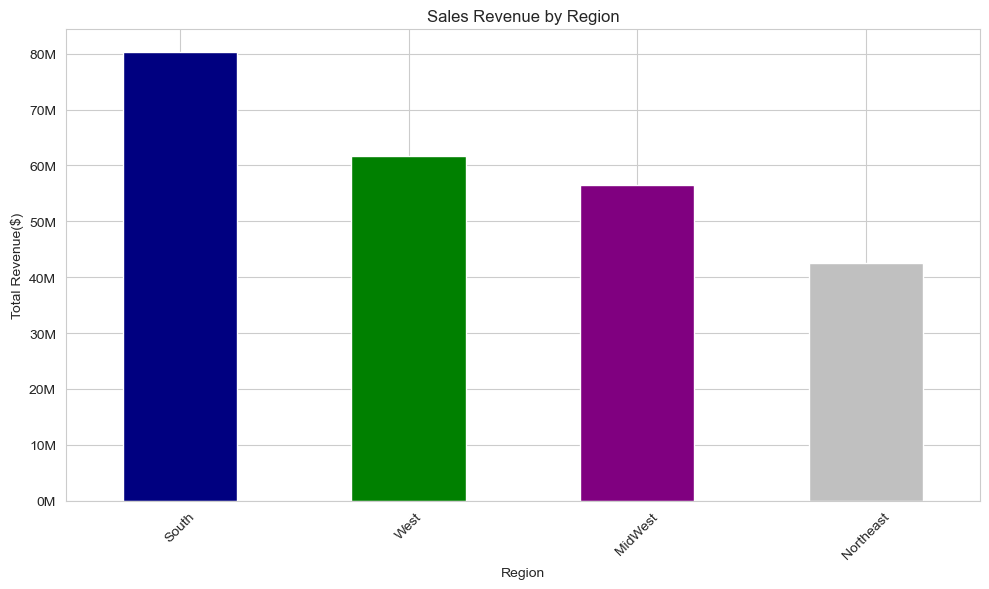

In [59]:
# Sales revenue by Region
Sales_by_Region = df.groupby(['Region'])['prices'].sum().sort_values(ascending=False)

# Define custom colors for the bars
colors = ['navy', 'green', 'purple', 'silver']

# Plotting
bar8 = plt.figure(figsize=(10, 6))
Sales_by_Region.plot(kind='bar', color=colors)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Set y-axis ticks to be in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Sales Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue($)')
plt.xticks(rotation=45)

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar8_region_rev.png'))

plt.show()


In [60]:
#Customer totals by region: user_id grouped by region
df.groupby('Region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\1059333280.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)


,user_id
Region,
South,54193
West,41481
MidWest,38376
Northeast,28581


In [61]:
# Sales revenue by Region
Regional_Revenue_by_Department = df.groupby(['Region', 'department'])['prices'].sum()

# Sort the output by region first and then by prices sum
Regional_Revenue_by_Department_sorted = Regional_Revenue_by_Department.groupby(level='Region', group_keys=False).apply(lambda x: x.sort_values(ascending=False))

# Display all rows
pd.set_option('display.max_rows', None)

print(Regional_Revenue_by_Department_sorted)

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\3925577062.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Regional_Revenue_by_Department = df.groupby(['Region', 'department'])['prices'].sum()


Region     department     
MidWest    produce           17034110.00
           dairy eggs        10099573.00
           beverages          4603243.00
           frozen             3846657.75
           pantry             3368091.25
           snacks             2758447.50
           meat seafood       2574335.75
           bakery             2058264.62
           deli               1830725.00
           canned goods       1794251.12
           dry goods pasta    1425234.75
           breakfast          1252947.25
           household          1230175.75
           personal care       804340.69
           babies              728255.62
           international       463167.19
           alcohol             276848.09
           pets                166938.80
           missing             134758.70
           bulk                 66951.10
           other                57296.80
Northeast  produce           12708319.00
           dairy eggs         7621323.00
           beverages          

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\3925577062.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Regional_Revenue_by_Department_sorted = Regional_Revenue_by_Department.groupby(level='Region', group_keys=False).apply(lambda x: x.sort_values(ascending=False))


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\850609617.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Regional_Revenue_by_Department = df.groupby(['department', 'Region'])['prices'].sum().unstack().fillna(0)


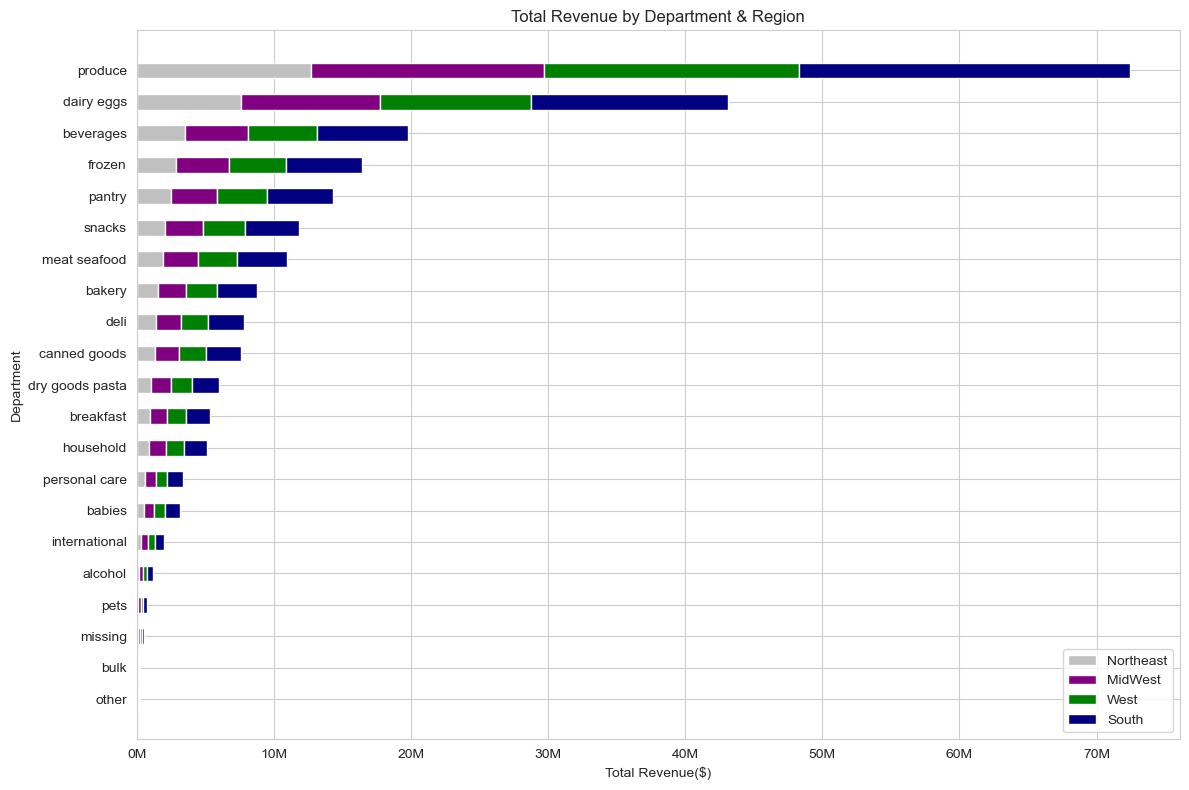

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for each region
colors = {'South': 'navy', 'West': 'green', 'MidWest': 'purple', 'Northeast': 'silver'}

# Sales revenue by Region
Regional_Revenue_by_Department = df.groupby(['department', 'Region'])['prices'].sum().unstack().fillna(0)

# Sort the data by the total revenue of each department in ascending order
Regional_Revenue_by_Department['Total'] = Regional_Revenue_by_Department.sum(axis=1)
Regional_Revenue_by_Department = Regional_Revenue_by_Department.sort_values(by='Total', ascending=True)
Regional_Revenue_by_Department.drop(columns=['Total'], inplace=True)

# Sort the columns (regions) by their total revenue in ascending order
Regional_Revenue_by_Department = Regional_Revenue_by_Department.apply(lambda x: x.sort_values(), axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Determine bar width
bar_width = 0.5
index = np.arange(len(Regional_Revenue_by_Department.index))

# Iterate through each region
cumulative = np.zeros(len(Regional_Revenue_by_Department.index))
for region in Regional_Revenue_by_Department.columns:
    ax.barh(index, Regional_Revenue_by_Department[region], height=bar_width, left=cumulative, color=colors[region], label=region)
    cumulative += Regional_Revenue_by_Department[region]

# Set labels and title
ax.set_xlabel('Total Revenue($)')
ax.set_ylabel('Department')
ax.set_title('Total Revenue by Department & Region')

# Set legend in the lower right
ax.legend(loc='lower right')

# Set y-ticks positions and labels
ax.set_yticks(index)
ax.set_yticklabels(Regional_Revenue_by_Department.index)

# Set x-axis ticks to be in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_rev_dept.png'))

# Show plot
plt.show()


In [63]:
# Product_name sales revenue by product across all regions
Product_Revenue = df.groupby(['product_name'])['prices'].sum()

# Sort the output by prices sum and get the top 10 selling products
top_10_products = Product_Revenue.sort_values(ascending=False).head(10)

# Display top 10 selling products
print("Top 10 selling products across all regions:")
print(top_10_products)


Top 10 selling products across all regions:
product_name
Banana                     5573917.50
Bag of Organic Bananas     3773951.00
Large Lemon                2035558.00
Limes                      1980839.62
Organic Baby Spinach       1900530.38
Organic Strawberries       1868712.50
Organic Whole Milk         1708979.25
Cucumber Kirby             1222478.38
Apple Honeycrisp Organic   1161120.88
Organic Cucumber           1108235.75
Name: prices, dtype: float32


In [64]:
# Get the total number of unique users grouped by 'Region' and 'family_status'
unique_users_count = df.groupby(['Region', 'family_status'])['user_id'].nunique()

# Sort the counts by 'Region' first
unique_users_count_sorted = unique_users_count.groupby(level='Region').apply(lambda x: x.sort_values(ascending=False))

print(unique_users_count_sorted)


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\2918896398.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_users_count = df.groupby(['Region', 'family_status'])['user_id'].nunique()


Region     Region     family_status                   
MidWest    MidWest    married                             26970
                      single                               6359
                      divorced/widowed                     3207
                      living with parents and siblings     1840
Northeast  Northeast  married                             20100
                      single                               4784
                      divorced/widowed                     2471
                      living with parents and siblings     1226
South      South      married                             38052
                      single                               8932
                      divorced/widowed                     4605
                      living with parents and siblings     2604
West       West       married                             29174
                      single                               6821
                      divorced/widowed           

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\2918896398.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_users_count_sorted = unique_users_count.groupby(level='Region').apply(lambda x: x.sort_values(ascending=False))


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\1890714674.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_users_count = df.groupby(['Region', 'family_status'])['user_id'].nunique()
C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\1890714674.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_users_count_sorted = unique_users_count.groupby(level='Region').apply(lambda x: x.sort_values(ascending=True))


<Figure size 1200x800 with 0 Axes>

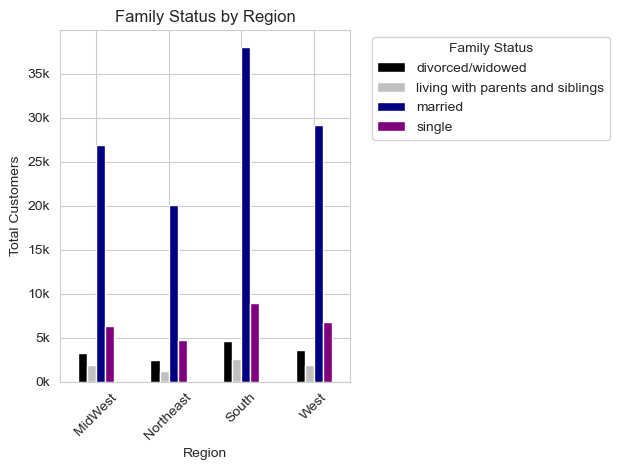

In [65]:
import matplotlib.pyplot as plt

# Get the total number of unique users grouped by 'Region' and 'family_status'
unique_users_count = df.groupby(['Region', 'family_status'])['user_id'].nunique()

# Sort the counts by 'Region' first and then by 'family_status' within each region in ascending order
unique_users_count_sorted = unique_users_count.groupby(level='Region').apply(lambda x: x.sort_values(ascending=True))

# Reset index to remove duplicate 'Region' values
unique_users_count_sorted = unique_users_count_sorted.reset_index(level=0, drop=True)

# Define custom colors for the bars
colors = ['black', 'silver', 'navy', 'purple']

# Plotting
bar9 = plt.figure(figsize=(12, 8))
unique_users_count_sorted.unstack().plot(kind='bar', color=colors)
plt.title('Family Status by Region')
plt.xlabel('Region')
plt.ylabel('Total Customers')
plt.xticks([0, 1, 2, 3], ['MidWest', 'Northeast', 'South', 'West'], rotation=45)
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting y-axis ticks to display in 'k' format
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}k'.format(x / 1000)))

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar9_region_fam.png'))

plt.show()


In [66]:
# Summary of familystatus revenue by region
Revenue_familystatus_by_region = df.groupby(['Region', 'family_status'])['prices'].sum()

# Sort the result by region and then by the sum of prices
Revenue_familystatus_by_region_sorted = Revenue_familystatus_by_region.groupby(level='Region').apply(lambda x: x.sort_values(ascending=False))

# Print the sorted result
print(Revenue_familystatus_by_region_sorted)


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\1525264209.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Revenue_familystatus_by_region = df.groupby(['Region', 'family_status'])['prices'].sum()


Region     Region     family_status                   
MidWest    MidWest    married                            39622520.00
                      single                              9400919.00
                      divorced/widowed                    4804310.50
                      living with parents and siblings    2746862.25
Northeast  Northeast  married                            29984662.00
                      single                              6802306.00
                      divorced/widowed                    3741539.00
                      living with parents and siblings    1988367.00
South      South      married                            56289048.00
                      single                             13274998.00
                      divorced/widowed                    6847364.50
                      living with parents and siblings    3944910.25
West       West       married                            43465980.00
                      single                    

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\1525264209.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Revenue_familystatus_by_region_sorted = Revenue_familystatus_by_region.groupby(level='Region').apply(lambda x: x.sort_values(ascending=False))


<Figure size 1200x800 with 0 Axes>

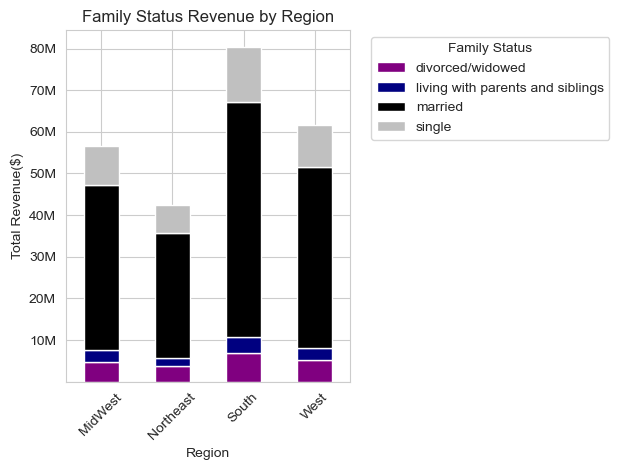

In [67]:
# Define custom colors for the bars
colors = {'single': 'purple', 'married': 'navy', 'divorced/widowed': 'black', 'living with parents and siblings': 'silver'}


# Plotting
bar10 = plt.figure(figsize=(12, 8))
Revenue_familystatus_by_region_sorted.unstack().plot(kind='bar', stacked=True, color=colors.values())
# Title and labels
plt.title('Family Status Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue($)')
plt.xticks([0, 1, 2, 3], ['MidWest', 'Northeast', 'South', 'West'], rotation=45)
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize y-axis ticks to display values in millions without zeros
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000000)}M' if x != 0 else ''))

# Save the plot
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar10_region_famrev.png'))

plt.show()


# 04h: Line: Age vs Dependants
Q5d:Is there a connection between age and family status in terms of ordering
habits?

C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fa_an\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


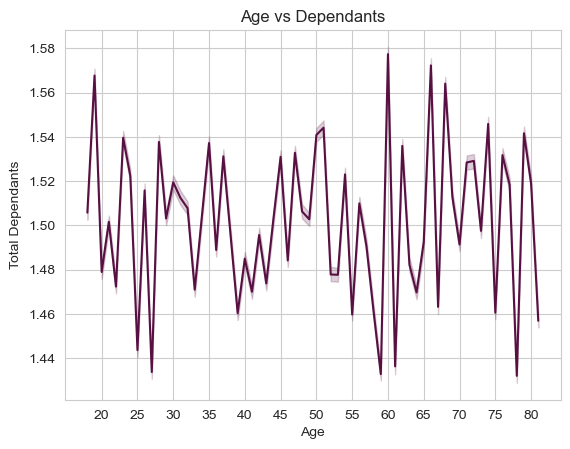

In [68]:
#define custom color
custom_color = '#580F41'

#create line chart based on df_4 and small sample
line_3 = sns.lineplot(x = 'Age', y = 'total_dependants', data = df, color = custom_color)

# Add title and axis labels
plt.title('Age vs Dependants')
plt.xlabel('Age')
plt.ylabel('Total Dependants')

# Set x-axis ticks at custom positions, start at 20, end at 85, increments of 5
plt.xticks(range(20, 85, 5))

#save visualization
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line3_age_dependants.png'))

In [69]:
#There is no connection between age and family status. Looking at the visualization that there are NO distinct patterns.

# 04i: Scatter: Age vs Income & Scatter: Income vs Order Total
Q5e:What different classifications does the demographic information suggest?
Age? Income? Certain types of goods? Family status?

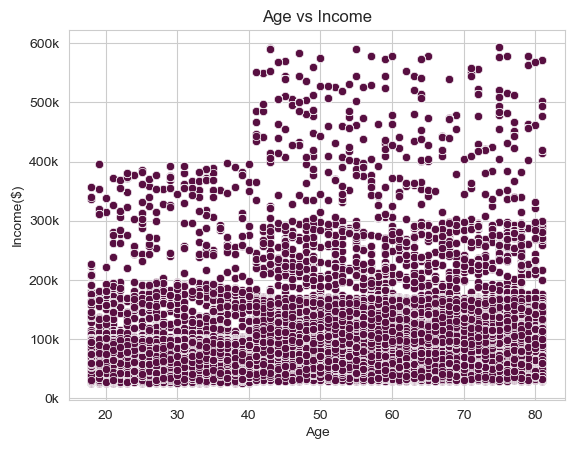

In [70]:
# Define custom color
custom_color = '#580F41'

# Create a scatterplot age vs income with custom color
scatter_1 = sns.scatterplot(x='Age', y='income', data=df, color = custom_color)

# Add title and axis labels
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income($)')

# Customize y-axis ticks to display values in thousands without zeros
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))

# Add grid
plt.grid(True)

#save visualization
scatter_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))

In [71]:
#However, there is a connection between age and income. Customers over the age of 40 have more disposable income.That doesn't mean
#that they spend more.

In [72]:
# Calculate the mean of 'sum_order' and assign it to a new column 'mean_sum_order'
df['mean_sum_order'] = df['sum_order'].mean()

In [73]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_label,busiest_days,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency_flag,Gender,State,Age,total_dependants,family_status,income,sum_order,department,Region,exclusion_flag,Age_Range,Income_Range,pet_items,baby_items,snacks,frozen,alcohol,Single_MF,Adult_Parent,Married,mean_sum_order
0,2539329,1,1,Monday,8,NaN,196,1,0,Soda,7,9.00,Mid-range product,Regularly busy,10,New Customer,6.37,Low Spender,20.50,Non-frequent customer,Female,Alabama,31,3,married,40423,31.60,beverages,South,0,1,1.00,0,0,1,0,0,2,1,1,122.23
1,2398795,1,2,Tuesday,7,15.00,196,1,1,Soda,7,9.00,Mid-range product,Slowest days,10,New Customer,6.37,Low Spender,20.50,Non-frequent customer,Female,Alabama,31,3,married,40423,35.40,beverages,South,0,1,1.00,0,0,1,0,0,2,1,1,122.23
2,473747,1,3,Tuesday,12,21.00,196,1,1,Soda,7,9.00,Mid-range product,Slowest days,10,New Customer,6.37,Low Spender,20.50,Non-frequent customer,Female,Alabama,31,3,married,40423,28.20,beverages,South,0,1,1.00,0,0,1,0,0,2,1,1,122.23
3,2254736,1,4,Wednesday,7,29.00,196,1,1,Soda,7,9.00,Mid-range product,Slowest days,10,New Customer,6.37,Low Spender,20.50,Non-frequent customer,Female,Alabama,31,3,married,40423,26.00,beverages,South,0,1,1.00,0,0,1,0,0,2,1,1,122.23
4,431534,1,5,Wednesday,15,28.00,196,1,1,Soda,7,9.00,Mid-range product,Slowest days,10,New Customer,6.37,Low Spender,20.50,Non-frequent customer,Female,Alabama,31,3,married,40423,57.00,beverages,South,0,1,1.00,0,0,1,0,0,2,1,1,122.23


In [74]:
# Calculate the mean of 'sum_order' grouped by 'user_id' and assign it to a new column 'mean_sum_order'
df['mean_sum_order'] = df.groupby('user_id')['sum_order'].transform('mean')

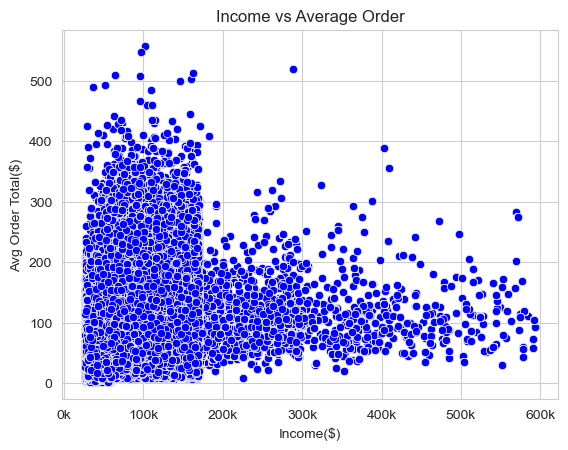

In [75]:
##updated visualization using mean_sum_order and income

# Define custom color
custom_color = 'blue'

# Create a scatterplot income vs sum_order with custom color
scatter_2 = sns.scatterplot(x='income', y='mean_sum_order', color=custom_color, data=df)

# Add title and axis labels
plt.title('Income vs Average Order')
plt.xlabel('Income($)')
plt.ylabel('Avg Order Total($)')

# Customize x-axis ticks to display values in thousands without zeros
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000)}k'))

# Add grid
plt.grid(True)

#save visualization
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat2_income_mean_order.png'))

plt.show()


In [76]:
#And customers with income under $170,000 spend more money per order. Customers with more income/disposable income spend less per order. 
#There should be a strategy to get more revenue from higher income customers!

In [77]:
#let's see what the details are of family_status, Age_Range, Income_Range, and revenue by user_id count  - create crosstab:

# Group the data by 'user_id', 'family_status', 'Age_Range', and 'Income_Range', and count the occurrences
grouped_data = df.groupby(['user_id', 'family_status', 'Age_Range', 'Income_Range']).size().reset_index(name='count')

# Create a crosstab
crosstab_data = pd.crosstab(index=[grouped_data['family_status'], grouped_data['Age_Range'], grouped_data['Income_Range']], columns='count')

# Print the crosstab data
print(crosstab_data)

# Export the crosstab to Excel
crosstab_data.to_excel('crosstab_data.xlsx')


col_0                                                    count
family_status                    Age_Range Income_Range       
divorced/widowed                 2         1.00            574
                                           2.00            388
                                           3.00           1044
                                           4.00           1122
                                 3         1.00           1945
                                           2.00           1285
                                           3.00           3592
                                           4.00           3881
living with parents and siblings 0         1.00           2819
                                           2.00           2513
                                           3.00            368
                                           4.00             39
                                 1         1.00            878
                                           2.00        

In [78]:
# Group the data by 'user_id', 'family_status', 'Age_Range', and 'Income_Range', and calculate the sum of 'sum_order'
grouped_data = df.groupby(['user_id', 'family_status', 'Age_Range', 'Income_Range'])['prices'].sum().reset_index(name='prices_sum')

# Create a crosstab
crosstab_data = pd.crosstab(index=[grouped_data['family_status'], grouped_data['Age_Range'], grouped_data['Income_Range']], columns='count', values=grouped_data['prices_sum'], aggfunc='sum')

# Print the crosstab data
print(crosstab_data)

# Export the crosstab to Excel
crosstab_data.to_excel('crosstab2_data.xlsx')

#pairing this up with other crosstab as not able to get a script to have unique user counts and total sales.


col_0                                                         count
family_status                    Age_Range Income_Range            
divorced/widowed                 2         1.00           539567.12
                                           2.00           708466.12
                                           3.00          1698926.38
                                           4.00          1912886.12
                                 3         1.00          1686413.75
                                           2.00          2177399.25
                                           3.00          5787677.50
                                           4.00          6121027.50
living with parents and siblings 0         1.00          3821672.00
                                           2.00          4192749.00
                                           3.00           550020.88
                                           4.00            98962.30
                                 1         1.00 

# 04j: Comparisons of Different Customer Groups
Q5f:What differences can you find in ordering habits of different customer
profiles? Consider the price of orders, the frequency of orders, the products
customers are ordering, and anything else you can think of.

In [79]:
#look at Married

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\2064423106.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = married_single_df.groupby(['orders_day_of_week', 'family_status']).size().unstack(fill_value=0)


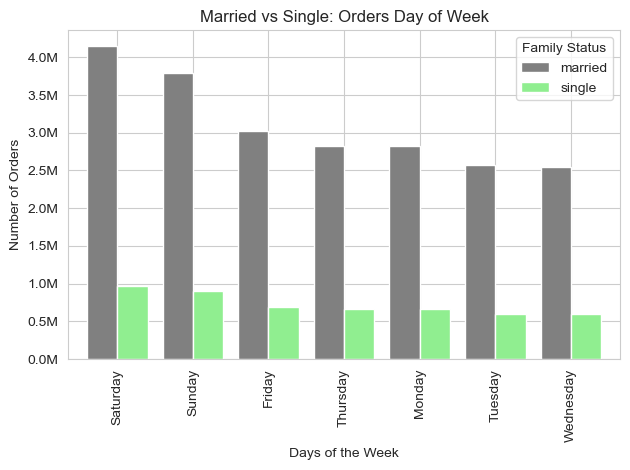

In [80]:
# Filter the DataFrame to include only 'single' and 'married' family_status
married_single_df = df[df['family_status'].isin(['single', 'married'])]

# Group the filtered data by 'orders_day_of_week' and 'family_status' and count the occurrences
grouped_data = married_single_df.groupby(['orders_day_of_week', 'family_status']).size().unstack(fill_value=0)

# Sort the bars in ascending order based on the total number of orders
grouped_data['total'] = grouped_data.sum(axis=1)
grouped_data.sort_values(by='total', ascending=False, inplace=True)
grouped_data.drop(columns='total', inplace=True)

# Plot a side-by-side bar chart
ax = grouped_data.plot(kind='bar', color=['gray', 'lightgreen'], width=0.8, edgecolor='white')

# Add labels and title
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')
plt.title('Married vs Single: Orders Day of Week')

# Add legend
plt.legend(title='Family Status')

# Format y-axis labels in millions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1000000)))

#save visualization
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar11_married_single_dow.png'))

# Show the plot
plt.show()


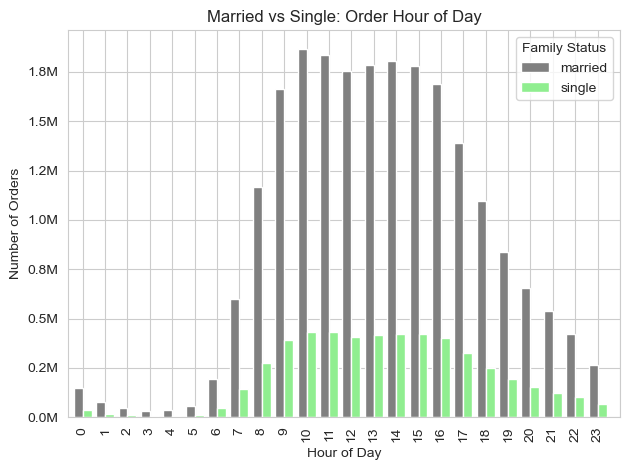

In [81]:
# Filter the DataFrame to include only 'single' and 'married' family_status
married_single_df = df[df['family_status'].isin(['single', 'married'])]

# Group the filtered data by 'order_hour_of_day' and 'family_status' and count the occurrences
grouped_data = married_single_df.groupby(['order_hour_of_day', 'family_status']).size().unstack(fill_value=0)

# Plot a side-by-side bar chart
ax = grouped_data.plot(kind='bar', color=['gray', 'lightgreen'], width=0.8, edgecolor='white')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Married vs Single: Order Hour of Day')

# Set x-axis ticks to go from 0 to 24 for each hour of the day
plt.xticks(range(25))

# Add legend
plt.legend(title='Family Status')

# Format y-axis labels in millions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1000000)))

# Save visualization
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar12_married_single_hod.png'))

# Show the plot
plt.show()


In [82]:
#Department preferences for Married

# Filter the DataFrame for customers with Married flag equal to 1
Married_df = df[df['Married'] == 1]

# Group by 'department' and calculate the sum of prices
Married_department = Married_df.groupby(['department'])['prices'].sum()

# Sort the result by the sum of prices
departments_Married = Married_department.sort_values(ascending=False)

# Print the department totals for Married flag equal to 1
print("Departments for Married:")
print(departments_Married)


Departments for Married:
department
produce           50828836.00
dairy eggs        30238498.00
beverages         13890907.00
frozen            11520307.00
pantry            10041433.00
snacks             8317028.00
meat seafood       7775379.50
bakery             6177559.00
deli               5460954.50
canned goods       5384041.50
dry goods pasta    4250257.50
breakfast          3783144.50
household          3657763.50
personal care      2381524.75
babies             2198629.50
international      1378228.62
alcohol             815329.69
pets                504110.41
missing             393185.19
bulk                198557.50
other               166535.09
Name: prices, dtype: float32


In [83]:
# Calculate the sum of prices for the Married_df DataFrame
total_prices_married = Married_df['prices'].sum()

# Print the total sum of prices
print("Total prices for Married:")
print(total_prices_married)


Total prices for Married:
169362240.0


In [84]:
#Besides Married customers brining in more revenue, the deparment preferences are the same.

In [85]:
#look at Singles to compare to Married

In [89]:
# Filter the DataFrame for customers with Single flag equal to 0 or 1
Single_df = df[(df['Single_MF'] == 0) | (df['Single_MF'] == 1)]

# Group by 'department' and calculate the sum of prices
Single_MF_department = Single_df.groupby(['department'])['prices'].sum()

# Sort the result by the sum of prices
departments_single = Single_MF_department.sort_values(ascending=False)

# Print the department totals for Single_MF flag equal to 0 or 1
print("Departments for Single:")
print(departments_single)

Departments for Single:
department
produce           11962686.00
dairy eggs         7097949.00
beverages          3261104.75
frozen             2670064.25
pantry             2338739.00
snacks             1942244.25
meat seafood       1757964.75
bakery             1451654.62
deli               1296405.12
canned goods       1254680.25
dry goods pasta     984835.12
breakfast           884429.88
household           831323.50
personal care       560630.88
babies              522457.41
international       326295.09
alcohol             198972.20
pets                125598.10
missing              94332.40
bulk                 44323.80
other                40439.70
Name: prices, dtype: float32


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\4000702862.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_grouped_data = high_income_df.groupby('orders_day_of_week').size()


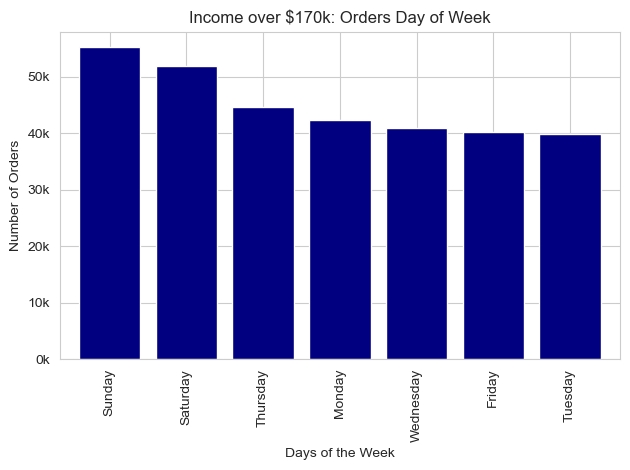

In [90]:
# Filter the DataFrame for high-income customers (income > $170,000)
high_income_df = df[df['income'] > 170000]

# Group the high-income data by 'orders_day_of_week' and count the occurrences
high_grouped_data = high_income_df.groupby('orders_day_of_week').size()

# Sort the data by days of the week in descending order of total orders
sorted_days_of_week = high_grouped_data.sort_values(ascending=False).index

# Reindex the high_grouped_data Series based on the sorted days of the week
high_grouped_data_sorted = high_grouped_data.reindex(sorted_days_of_week)

# Plot bar chart for high-income group
ax = high_grouped_data_sorted.plot(kind='bar', color='navy', width=0.8)

# Add labels and title
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')
plt.title('Income over $170k: Orders Day of Week')

# Format y-axis labels in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}k'.format(x / 1000)))

# Save visualization
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar13_high_income_dow.png'))

# Show the plot
plt.show()


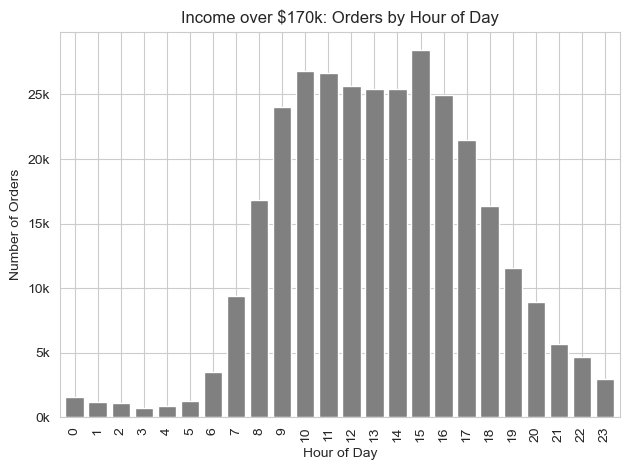

In [91]:
# Filter the DataFrame for high-income customers (income > $170,000)
high_income_df = df[df['income'] > 170000]

# Group the high-income data by 'order_hour_of_day' and count the occurrences
high_grouped_data_hour = high_income_df.groupby('order_hour_of_day').size()

# Plot bar chart for high-income group
ax = high_grouped_data_hour.plot(kind='bar', color='gray', width=0.8)

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Income over $170k: Orders by Hour of Day')

# Format y-axis labels in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}k'.format(x / 1000)))

# Save visualization
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar14_high_income_hod.png'))

# Show the plot
plt.show()


In [92]:
#Note: Show the customers with income over $170K since those orders day of week and hour of day will be different from the
#overall findings of the larger customer base.

In [93]:
# Lower Income under $170,000 shopping preferences for departments & revenue:

# Filter the DataFrame for customers with income less than or equal to $170,000
lowincome_df = df[df['income'] <= 170000]

# Group by 'department' and calculate the sum of prices
total_sales_by_department_low = lowincome_df.groupby(['department'])['prices'].sum()

# Sort the total sales by department in ascending order
total_sales_by_department_low_sorted = total_sales_by_department_low.sort_values(ascending=False)

# Print total sales by department in ascending order
print(total_sales_by_department_low_sorted)


department
produce           71953704.00
dairy eggs        42695760.00
beverages         19524352.00
frozen            16213134.00
pantry            14138420.00
snacks            11706557.00
meat seafood      10868529.00
bakery             8687410.00
deli               7743845.50
canned goods       7553579.00
dry goods pasta    5977036.00
breakfast          5324126.50
household          5057628.50
personal care      3355448.00
babies             3113804.00
international      1947044.50
alcohol            1115516.25
pets                714609.19
missing             557531.88
bulk                278999.69
other               234512.59
Name: prices, dtype: float32


In [94]:
#Lower Income under 170,000 shopping preferences for product_name & revenue:

# Group by 'department' and 'product_name', and calculate the sum of prices
total_price_by_product = lowincome_df.groupby(['department', 'product_name'])['prices'].sum()

# Sort the result by the sum of prices and select the top 10
top_10_products_low = total_price_by_product.sort_values(ascending=False).head(10)

# Print the top 10 products
print(top_10_products_low)


department  product_name            
produce     Banana                     5523180.00
            Bag of Organic Bananas     3749179.50
            Large Lemon                2022132.00
            Limes                      1965316.50
            Organic Baby Spinach       1896651.75
            Organic Strawberries       1862587.75
dairy eggs  Organic Whole Milk         1705689.62
produce     Cucumber Kirby             1215152.38
            Apple Honeycrisp Organic   1159513.50
            Organic Cucumber           1104231.75
Name: prices, dtype: float32


In [95]:
# Get the unique user_id counts of lower-income customers
unique_user_counts_low_income = lowincome_df['user_id'].nunique()

# Print the unique user_id counts of lower-income customers
print("Unique user_id counts of low-income customers:", unique_user_counts_low_income)


Unique user_id counts of low-income customers: 161488


In [96]:
#Let's get a count of where the larger customer group with income under $170k lives:

# Count the number of unique customers in each Region
customer_counts_by_state_low = lowincome_df.groupby('Region')['user_id'].nunique()

# Sort the counts in ascending order
customer_counts_by_state_low_sorted = customer_counts_by_state_low.sort_values(ascending=False)

# Print the number of customers in states with income under $170k
print("Number of customers in states with income greater than $170,000:")
print(customer_counts_by_state_low_sorted)

C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\2388785897.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts_by_state_low = lowincome_df.groupby('Region')['user_id'].nunique()


Number of customers in states with income greater than $170,000:
Region
South        53805
West         41187
MidWest      38100
Northeast    28396
Name: user_id, dtype: int64


In [97]:
# Higher Income over $170,000 shopping preferences for departments & revenue:

# Filter the DataFrame for customers with income more than $170,000
highincome_df = df[df['income'] > 170000]

# Group by 'department' and calculate the sum of prices
total_sales_by_department_high = highincome_df.groupby(['department'])['prices'].sum()

# Sort the total sales by department in ascending order
total_sales_by_department_high_sorted = total_sales_by_department_high.sort_values(ascending=False)

# Print total sales by department in ascending order
print(total_sales_by_department_high_sorted)


department
produce           502055.19
dairy eggs        422501.81
beverages         234421.20
frozen            195750.41
pantry            149036.59
meat seafood      130424.60
snacks            121363.10
bakery            119475.90
household         107282.00
canned goods       84199.70
deli               69342.60
dry goods pasta    65145.40
breakfast          63903.80
alcohol            63294.80
personal care      38467.10
pets               19400.50
babies             19292.50
international      18658.40
other               5056.60
missing             3401.40
bulk                 213.10
Name: prices, dtype: float32


In [98]:
#Higher Income over 170,000 shopping preferences for product_name & revenue:

# Group by 'product_name' and calculate the sum of prices
total_price_by_products = highincome_df.groupby(['department', 'product_name'])['prices'].sum()

# Sort the result by the sum of prices and select the top 10
top_10_products_high = total_price_by_products.sort_values(ascending=False).head(10)

# Print the top 10 products
print(top_10_products_high)

department  product_name                 
produce     Banana                          50737.50
            Bag of Organic Bananas          24771.50
            Limes                           15523.20
            Large Lemon                     13426.00
frozen      Blueberries                     12529.20
dairy eggs  2% Reduced Fat Milk             11260.80
produce     Roma Tomato                     10931.20
            Small Hass Avocado              10524.80
dairy eggs  Whole Milk                       8640.00
            Original Whipped Cream Cheese    7800.00
Name: prices, dtype: float32


In [99]:
# Get the unique user_id counts of higher-income customers
unique_user_counts_high_income = highincome_df['user_id'].nunique()

# Print the unique user_id counts of higher-income customers
print("Unique user_id counts of high-income customers:", unique_user_counts_high_income)

Unique user_id counts of high-income customers: 1143


In [100]:
#Let's get a count of where this smaller customer group with income over $170k lives:

# Count the number of unique customers in each Region
customer_counts_by_state = highincome_df.groupby('Region')['user_id'].nunique()

# Sort the counts in ascending order
customer_counts_by_state_sorted = customer_counts_by_state.sort_values(ascending=False)

# Print the number of customers in states with income over $170k
print("Number of customers in states with income greater than $170,000:")
print(customer_counts_by_state_sorted)

Number of customers in states with income greater than $170,000:
Region
South        388
West         294
MidWest      276
Northeast    185
Name: user_id, dtype: int64


C:\Users\fa_an\AppData\Local\Temp\ipykernel_13432\2062157479.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts_by_state = highincome_df.groupby('Region')['user_id'].nunique()


In [101]:
#Customers with income over 170,000 have a preference from Departments: Produce, Dairy Eggs, and Beverages. A little more variety of the top products, which includes a bit more dairy eggs and frozen items compared to low

In [102]:
#Pet owners

In [103]:
#Department preferences for Pet Owners

# Filter the DataFrame for customers with Pets flag equal to 1
Pets_df = df[df['pet_items'] == 1]

# Group by 'department' and calculate the sum of prices
Pet_Owner_department = Pets_df.groupby(['department'])['prices'].sum()

# Sort the result by the sum of prices
departments_Pet_Owner = Pet_Owner_department.sort_values(ascending=False)

# Print the department totals for Pet Owners flag equal to 1
print("Departments for Pet Owners:")
print(departments_Pet_Owner)

Departments for Pet Owners:
department
produce           6205781.50
dairy eggs        4306589.50
beverages         2484307.75
frozen            2213790.75
pantry            1694869.50
meat seafood      1315789.00
snacks            1305420.88
bakery            1078083.25
household         1004430.81
canned goods       962024.62
deli               844207.81
dry goods pasta    748295.88
pets               734009.69
breakfast          607318.62
personal care      607197.69
babies             271267.41
international      236077.00
alcohol            214586.59
missing             62746.20
other               40016.10
bulk                16734.80
Name: prices, dtype: float32


In [104]:
# Calculate the sum of prices for the Pets_df
total_prices_petowners = Pets_df['prices'].sum()

# Print the total sum of prices
print("Total prices for Pet Owners:")
print(total_prices_petowners)

Total prices for Pet Owners:
26953556.0


In [105]:
#Pet owners do have some slightly different shopping preferences. One that stands out is having a highter preerence for meat seafood
#over snacks. And buying more household products. They also don't buy from the babies department, especially if they have a pet.
#About 3 times less than Adult_Parents.

In [106]:
#Families with Babies

In [107]:
#Department preferences for Adult_Parent

# Filter the DataFrame for customers with Adult_Parent flag equal to 1
Adult_Parent_df = df[df['Adult_Parent'] == 1]

# Group by 'department' and calculate the sum of prices
Adult_Parent_department = Adult_Parent_df.groupby(['department'])['prices'].sum()

# Sort the result by the sum of prices
departments_Adult_Parent = Adult_Parent_department.sort_values(ascending=False)

# Print the department totals for Adult Parent flag equal to 1
print("Departments for Adult Parents:")
print(departments_Adult_Parent)

Departments for Adult Parents:
department
produce           19514842.00
dairy eggs        11654198.00
beverages          5250834.50
frozen             4401980.50
pantry             3838683.00
snacks             3198643.50
meat seafood       2966811.50
bakery             2361404.25
deli               2095456.50
canned goods       2059795.12
dry goods pasta    1630498.25
breakfast          1449644.88
household          1389451.25
personal care       902191.88
babies              844581.69
international       532159.38
alcohol             311974.59
pets                190761.50
missing             147575.20
bulk                 76704.30
other                63073.00
Name: prices, dtype: float32


In [108]:
# Calculate the sum of prices for the Adult_Parent_df
total_prices_Adult_Parents = Adult_Parent_df['prices'].sum()

# Print the total sum of prices
print("Total prices for Adult Parents:")
print(total_prices_Adult_Parents)

Total prices for Adult Parents:
64881310.0


In [109]:
#Adult Parents spend more than Pet Owners and other groups on babies department items. Adult Parents also spend alot less on pets items. About 4 times less than Pet Parents.
#However, the ratio of babies/total revenue from this customer base is only 1%, perhaps they purchase more from another source.

# 05 Export df & Visualizations

In [110]:
#export df w/additional revisions
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacard_excluded_rev2.pkl'))